# Google palystore ratings


In [3]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
playstore= pd.read_csv('D:\\vivek\\Data science\\Data\\googleplaystore.csv\\googleplaystore.csv')
playstore .head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
playstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
playstore = playstore[playstore['Android Ver']!=np.nan] 
playstore = playstore[playstore['Android Ver']!="NaN"]
playstore = playstore[playstore['Installs']!='Free']
playstore = playstore[playstore['Installs']!='Paid']


In [9]:
playstore.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [10]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
playstore['Installs']= playstore['Installs'].apply(lambda x :x.replace('+','') if '+' in str(x) else x)
playstore['Installs']= playstore['Installs'].apply(lambda x :x.replace(',','') if ',' in str(x) else x)


In [12]:
playstore['Installs']= playstore['Installs'].apply(lambda x :int(x))
playstore['Installs']= playstore['Installs'].apply(lambda x :float(x))

In [13]:

playstore['Size']= playstore['Size'].apply(lambda x :x.replace('M','') if 'M' in str(x) else x)
playstore['Size']= playstore['Size'].apply(lambda x: float(str(x).replace('k',''))/1000 if 'k' in str(x) else x)
playstore['Size']= playstore['Size'].apply(lambda x :x.replace(',','') if ',' in str(x) else x)

playstore['Size']= playstore['Size'].apply(lambda x :x.replace('Varies with device',"NaN") if 'Varies with device' in str(x) else x)
playstore['Size']= playstore['Size'].apply(lambda x :float(x))


In [14]:
playstore['Price'] = playstore['Price'].apply(lambda x :x.replace('$','') if '$' in str(x) else x)
playstore['Price']= playstore['Price'].apply(lambda x :float(x))
playstore['Reviews']=playstore['Reviews'].apply(lambda x: float(x))

C:\Users\CTS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\CTS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\CTS\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\CTS\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


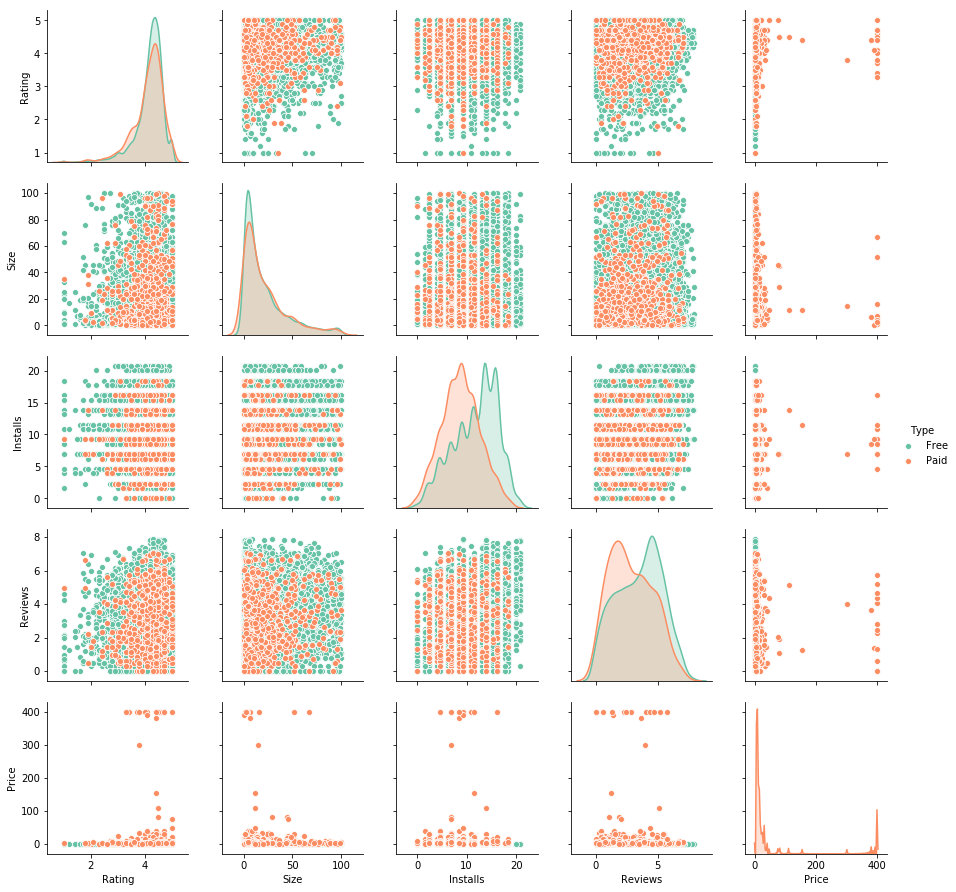

In [37]:
x = playstore['Rating'].dropna()
y = playstore['Size'].dropna()
z = playstore['Installs'][playstore.Installs!=0].dropna()
p = playstore['Reviews'][playstore.Reviews!=0].dropna()
t = playstore['Type'].dropna()
price = playstore['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

In [16]:
number_of_diffrent_apps = playstore['Category'].value_counts().sort_values(ascending=True)

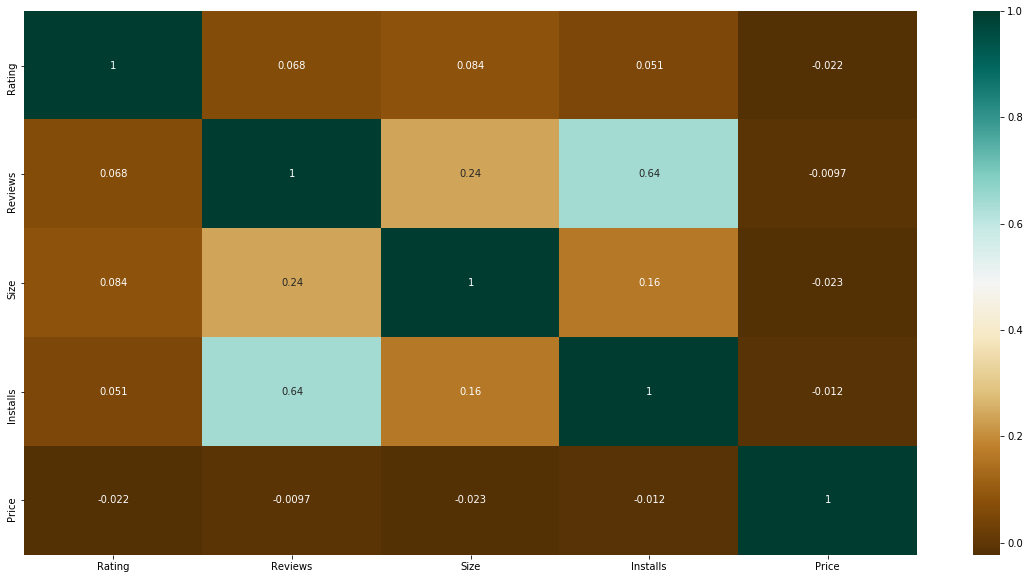

In [18]:
plt.figure(figsize=(20,10))
c= playstore.corr()
sns.heatmap(c,cmap='BrBG',annot= True)

C:\Users\CTS\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


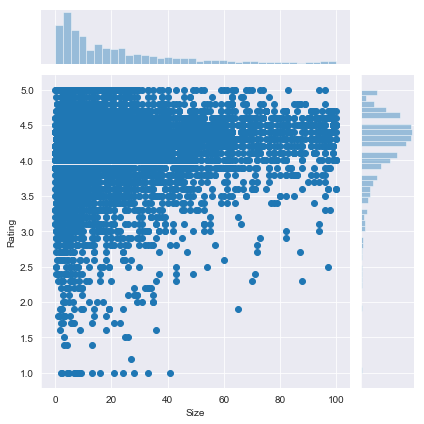

In [20]:
sns.set_style("darkgrid")
ax = sns.jointplot(playstore['Size'], playstore['Rating'])

In [23]:
playstore[['App','Category','Rating']][playstore.Price>200]

,App,Category,Rating
4197,most expensive app (H),FAMILY,4.3
4362,💎 I'm rich,LIFESTYLE,3.8
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6
5351,I am rich,LIFESTYLE,3.8
5354,I am Rich Plus,FAMILY,4.0
5355,I am rich VIP,LIFESTYLE,3.8
5356,I Am Rich Premium,FINANCE,4.1
5357,I am extremely Rich,LIFESTYLE,2.9
5358,I am Rich!,FINANCE,3.8
5359,I am rich(premium),FINANCE,3.5


In [45]:
most_rating_Apps= playstore[['App','Category','Rating']][playstore.Rating> 4.7]


In [46]:
most_reviewed_Apps

,App,Category,Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159.0
1,Coloring book moana,ART_AND_DESIGN,967.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,215644.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967.0
5,Paper flowers instructions,ART_AND_DESIGN,167.0
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,178.0
7,Infinite Painter,ART_AND_DESIGN,36815.0
8,Garden Coloring Book,ART_AND_DESIGN,13791.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,121.0
